In [1]:
import os, sys
sys.path.append('../../')
import numpy as np
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
from adjustText import adjust_text
from utils.evaluate import evaluate_density
from utils.evaluate import get_jsdiv
from pandas.api.types import CategoricalDtype
basemap = cx.providers.CartoDB.VoyagerNoLabels

In [2]:
pth = os.path.join('..', '..', 'data', 'geodataframe.gpkg')
gdf = gpd.read_file(pth)
gdf_us = gdf.loc[gdf.US].copy(); gdf_us

,city,state,country,latitude,longitude,population,msa,US,geometry
0,mahopac,new york,united states,41.37232,-73.73346,8369,New York-Northern New Jersey-Long Island NY-NJ...,True,POINT (-8207971.222 5067414.863)
1,seven hills,ohio,united states,41.39533,-81.67624,11690,None,True,POINT (-9092157.447 5070828.79)
2,new martinsville,west virginia,united states,39.64452,-80.85760,5218,None,True,POINT (-9001026.859 4814418.565)
6,jacksonville,oregon,united states,42.31346,-122.96699,2883,Jacksonville FL MSA,True,POINT (-13688622.711 5208050.499)
13,tigerville,south carolina,united states,35.06845,-82.36845,1312,Greenville-Mauldin-Easley SC MSA,True,POINT (-9169213.911 4173187.121)
...,...,...,...,...,...,...,...,...,...
24022,mansfield,texas,united states,32.56319,-97.14168,64274,Mansfield OH MSA,True,POINT (-10813762.352 3837467.237)
24023,belfast,maine,united states,44.42591,-69.00642,6682,None,True,POINT (-7681759.536 5531591.056)
24024,flushing,michigan,united states,43.06308,-83.85107,8086,Wheeling WV-OH MSA,True,POINT (-9334258.415 5321578.2)
24025,stone mountain,georgia,united states,33.80816,-84.17020,6109,Atlanta-Sandy Springs-Marietta GA MSA,True,POINT (-9369783.804 4003071.597)


In [3]:
# compute 'distance per capita' (~inverse density)
gdf_us = evaluate_density(gdf_us, 'msa'); gdf_us

c:\Users\ccrea\Documents\revelio-assignment\notebooks\evaluation\../..\utils\evaluate.py:57: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  centroids_map = (gdf.groupby(cluster_key).apply(lambda row: Point(
c:\Users\ccrea\Documents\revelio-assignment\notebooks\evaluation\../..\utils\evaluate.py:92: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  centroids = gdf_ref.groupby(cluster_key).apply(lambda row: Point(


,city,state,country,latitude,longitude,population,msa,US,geometry,msa_ref,log10_dpc
22671,whitehouse station,new jersey,united states,40.61538,-74.77044,2089,New York-Northern New Jersey-Long Island NY-NJ...,True,POINT (-8323407.307 4955774.763),New York-Northern New Jersey-Long Island NY-NJ...,-4.056829
18514,el paso,texas,united states,31.75872,-106.48693,681124,El Paso TX MSA,True,POINT (-11854070.824 3731680.382),El Paso TX MSA,-3.729801
17069,lemont,illinois,united states,41.67364,-88.00173,16788,Chicago-Naperville-Joliet IL-IN-WI MSA,True,POINT (-9796307.773 5112216.974),Chicago-Naperville-Joliet IL-IN-WI MSA,-3.490176
23831,branchburg,new jersey,united states,40.56290,-74.71400,14480,None,True,POINT (-8317124.435 4948081.731),New York-Northern New Jersey-Long Island NY-NJ...,-3.379416
22932,annandale,new jersey,united states,40.64093,-74.88128,1695,New York-Northern New Jersey-Long Island NY-NJ...,True,POINT (-8335745.96 4959522.319),New York-Northern New Jersey-Long Island NY-NJ...,-3.316366
...,...,...,...,...,...,...,...,...,...,...,...
20566,sitka,alaska,united states,57.05315,-135.33088,8863,None,True,POINT (-15064964.65 7770989.839),Fairbanks AK MSA,1.632165
10463,juneau,alaska,united states,58.30194,-134.41972,32756,None,True,POINT (-14963534.783 8031014.972),Fairbanks AK MSA,1.637624
21257,redding,connecticut,united states,41.30510,-73.39160,9176,Redding CA MSA,True,POINT (-8169915.541 5057448.537),Redding CA MSA,1.654026
19859,logan,ohio,united states,39.54007,-82.40710,7117,Logan UT-ID MSA,True,POINT (-9173516.41 4799329.881),Logan UT-ID MSA,1.667029


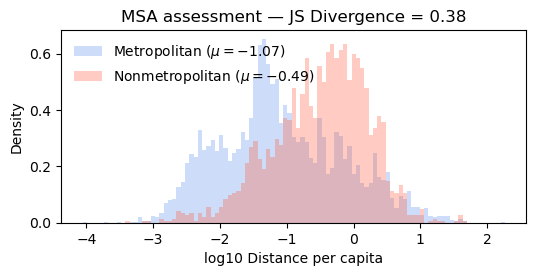

In [ ]:
# information theory assessment of metropolitan split
jsdiv, ax = get_jsdiv(gdf_us, 'msa',
                      plot = True,
                      return_ax = True,
                      clus_label = 'Metropolitan',
                      other_label = 'Nonmetropolitan')
ax.set_title(f'MSA assessment — JS Divergence = {jsdiv.round(2)}')
ax.set_xlabel('log10 Distance per capita')
ax.set_ylabel('Density')
plt.show()

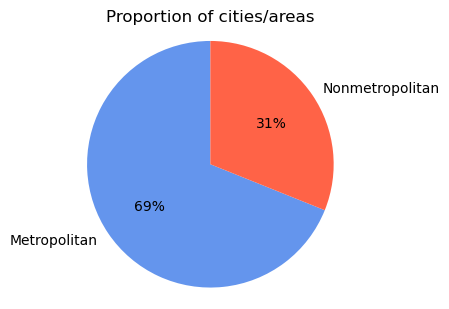

In [5]:
# proportion of cities in MSAs
counts = gdf_us.msa.notna().value_counts().rename(
    {True : 'Metropolitan', False : 'Nonmetropolitan'})
fig, ax = plt.subplots(1, 1, figsize = (3.5, 3.5))
counts.plot(
    kind = 'pie',
    autopct = '%1.0f%%',
    startangle = 90,
    colors = ['cornflowerblue', 'tomato'],
    ylabel = '',
    legend = False)
ax.set_title('Proportion of cities/areas')
ax.axis('equal')
plt.show()

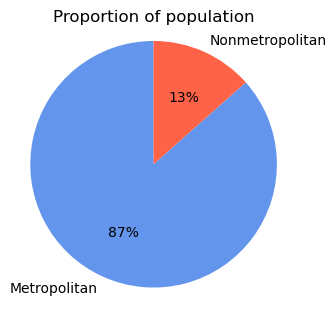

In [6]:
# proportion of population in MSAs
population = gdf_us.groupby(gdf_us.msa.notna()).population.sum()
population.index = population.index.map(
    {True : 'Metropolitan', False : 'Nonmetropolitan'})
population = population.loc[['Metropolitan', 'Nonmetropolitan']]
fig, ax = plt.subplots(1, 1, figsize = (3.5, 3.5))
population.plot(
    kind = 'pie',
    autopct = '%1.0f%%',
    startangle = 90,
    colors = ['cornflowerblue', 'tomato'],
    ylabel = '',
    legend = False)
ax.set_title('Proportion of population')
ax.axis('equal')
plt.show()

In [7]:
# high-level MSA statistics
msa_msk = gdf_us.msa.notna()
n_msa = gdf_us.loc[msa_msk, 'msa'].nunique()
pop_avg = (gdf_us.loc[msa_msk]
           .groupby('msa').population
           .sum().mean().astype(int))
n_city = (gdf_us.loc[msa_msk]
          .groupby('msa').city.
          count().mean().round(2))

print('Number of MSAs =', n_msa)
print('Population average =', pop_avg)
print('Number of cities =', n_city)

Number of MSAs = 336
Population average = 574443
Number of cities = 14.68


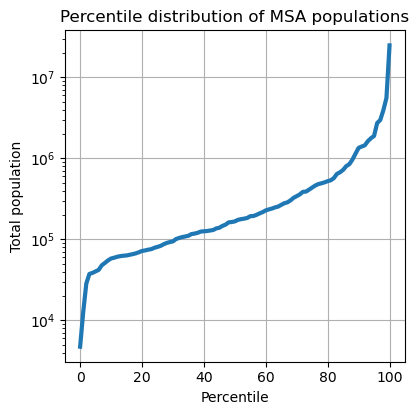

In [8]:
# MSA populations vs. percentiles
msa_pop = gdf_us.loc[msa_msk].groupby('msa').population.sum().sort_values()
percentile = np.arange(0, 101)
population = np.percentile(msa_pop, percentile)

fig, ax = plt.subplots(1, 1, figsize = (4.25, 4.25))
ax.plot(percentile, population, lw = 3)
ax.set_yscale('log')
ax.set_title('Percentile distribution of MSA populations')
ax.set_xlabel('Percentile')
ax.set_ylabel('Total population')
ax.grid(True)
plt.tight_layout()
plt.show()

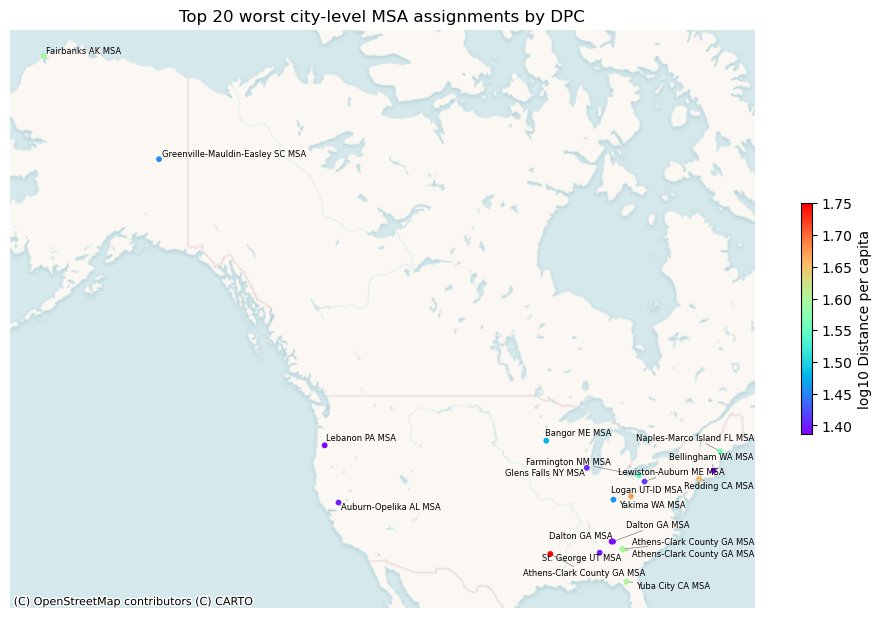

In [9]:
# worst city-level MSA assignments by DPC
top_n, ms, fs = 20, 10., 6.
fig, ax = plt.subplots(1, 1, figsize = (12, 12))
gdf_plt = gdf_us.loc[gdf_us.msa.notna()].copy()
gdf_plt.tail(top_n).plot(
    column = 'log10_dpc',
    cmap = 'rainbow',
    vmax = 1.75,
    markersize = ms,
    legend = True,
    legend_kwds = {'label': 'log10 Distance per capita', 'shrink' : .25},
    ax = ax)
cx.add_basemap(ax, source = basemap)
labels = [ax.text(row.geometry.x, row.geometry.y, row.msa, fontsize = fs)
          for _, row in gdf_plt.tail(top_n).iterrows()]
adjust_text(labels, ax = ax, arrowprops = dict(arrowstyle = '-', color = 'gray', lw = .5))
ax.set_title(f'Top {top_n} worst city-level MSA assignments by DPC')
ax.axis(False)
plt.show()

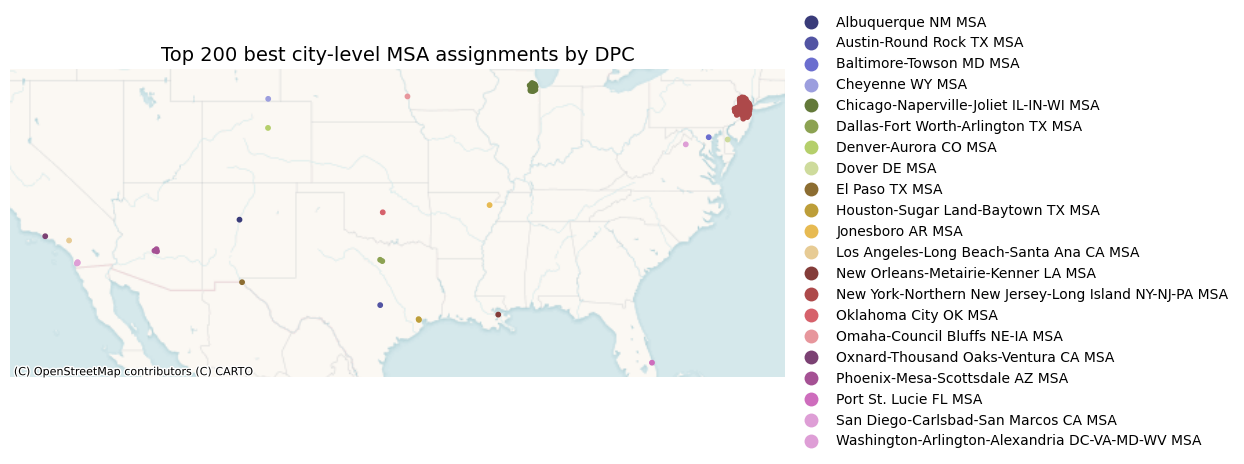

In [10]:
# best city-level MSA assignments by DPC
top_n = 200
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
gdf_plt.head(top_n).plot(
    column = 'msa',
    cmap = 'tab20b',
    markersize = ms,
    legend = True,
    ax = ax)
cx.add_basemap(ax, source = basemap)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 1.215))
leg.set_frame_on(False)
ax.set_title(f'Top {top_n} best city-level MSA assignments by DPC', size = 14)
ax.axis(False)
plt.show()

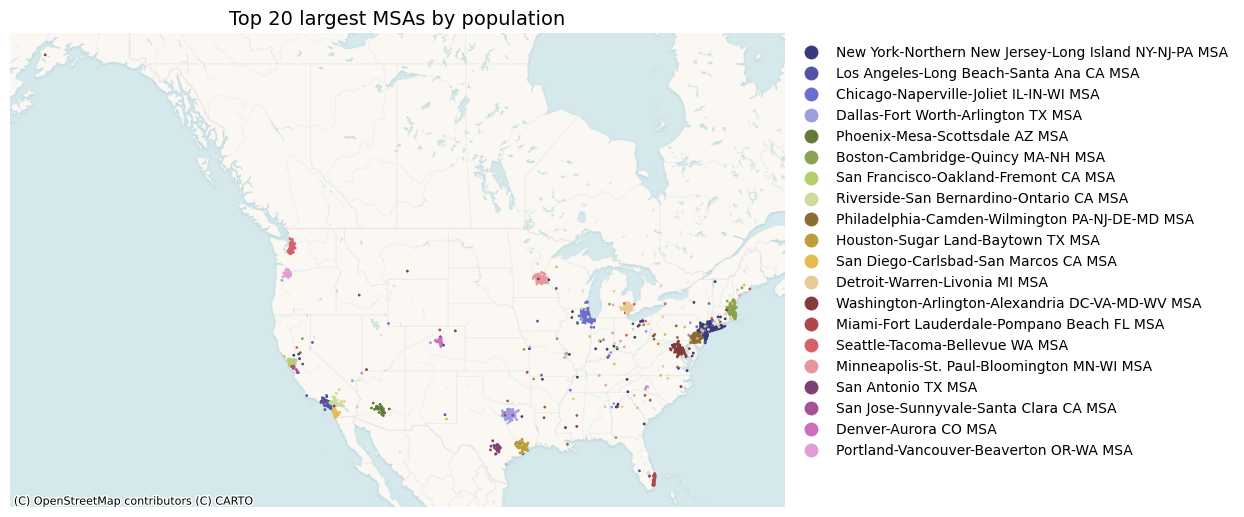

In [11]:
# largest MSAs by poulation
top_n, ms = 20, 1.
largest = (gdf_us.loc[gdf_us.msa.notna()]
           .groupby('msa').population.sum()
           .sort_values(ascending = False)
           .head(top_n))
gdf_plt = gdf_us.loc[gdf_us.msa.isin(largest.index)].copy()
gdf_plt['msa_population'] = gdf_plt.msa.map(largest)
gdf_plt.sort_values('msa_population', ascending = False, inplace = True)
gdf_plt['msa'] = gdf_plt.msa.astype(
    CategoricalDtype(categories = gdf_plt.msa.unique().tolist(), ordered = True))

fig, ax = plt.subplots(1, 1, figsize = (10, 10))
gdf_plt.plot(
    column = 'msa',
    cmap = 'tab20b',
    markersize = ms,
    legend = True,
    ax = ax)
cx.add_basemap(ax, source = basemap)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 1))
leg.set_frame_on(False)
ax.set_title(f'Top {top_n} largest MSAs by population', size = 14)
ax.axis(False)
plt.show()

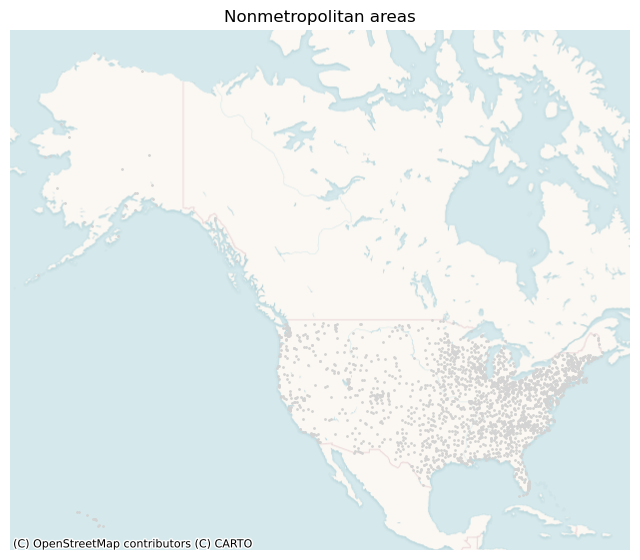

In [12]:
# unassigned nonmetropolitan areas
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
gdf_us.loc[gdf_us.msa.isna()].plot(color = 'lightgrey',
                                   markersize = ms,
                                   ax = ax)
cx.add_basemap(ax, source = basemap, zorder = 0)
ax.set_title('Nonmetropolitan areas')
ax.axis(False)
plt.show()